# 11.4. Stochastic Gradient Descent

In [1]:
%matplotlib inline
import math
import torch
from d2l import torch as d2l

## 11.4.1. Stochastic Gradient Updates

epoch 50, x1: -0.044993, x2: -0.066921


C:\Users\82103\anaconda3\envs\s.wag\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Users\82103\anaconda3\envs\s.wag\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


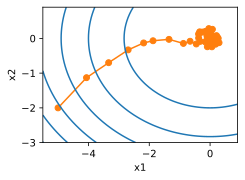

In [2]:
def f(x1, x2):  # Objective function
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):  # Gradient of the objective function
    return 2 * x1, 4 * x2

def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    # Simulate noisy gradient
    g1 += torch.normal(0.0, 1, (1,))
    g2 += torch.normal(0.0, 1, (1,))
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

def constant_lr():
    return 1

eta = 0.1
lr = constant_lr  # Constant learning rate
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

## 11.4.2. Dynamic Learning Rate

epoch 1000, x1: -0.820703, x2: -0.075498


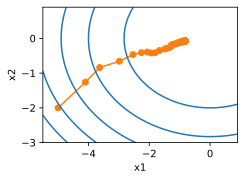

In [3]:
def exponential_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    return math.exp(-0.1 * t)

t = 1
lr = exponential_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=1000, f_grad=f_grad))

epoch 50, x1: -0.111847, x2: 0.017054


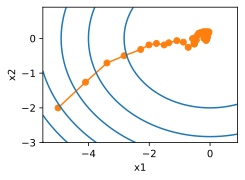

In [4]:
def polynomial_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    return (1 + 0.1 * t) ** (-0.5)

t = 1
lr = polynomial_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

## 11.4.3. Convergence Analysis for Convex Objectives¶
The following convergence analysis of stochastic gradient descent for convex objective functions is optional and primarily serves to convey more intuition about the problem. We limit ourselves to one of the simplest proofs [Nesterov & Vial, 2000]. Significantly more advanced proof techniques exist, e.g., whenever the objective function is particularly well behaved.

Suppose that the objective function  is convex in  for all . More concretely, we consider the stochastic gradient descent update:

(11.4.6)
where 
 is the objective function with respect to the training example 
 drawn from some distribution at step  and  is the model parameter. Denote by

(11.4.7)
the expected risk and by 
 its minimum with regard to . Last let 
 be the minimizer (we assume that it exists within the domain where  is defined). In this case we can track the distance between the current parameter 
 at time  and the risk minimizer 
 and see whether it improves over time:

(11.4.8)
 
 
We assume that the 
 norm of stochastic gradient 
 is bounded by some constant , hence we have that

(11.4.9)
We are mostly interested in how the distance between 
 and 
 changes in expectation. In fact, for any specific sequence of steps the distance might well increase, depending on whichever 
 we encounter. Hence we need to bound the dot product. Since for any convex function  it holds that 
 for all  and , by convexity we have

(11.4.10)
Plugging both inequalities (11.4.9) and (11.4.10) into (11.4.8) we obtain a bound on the distance between parameters at time  as follows:

(11.4.11)
This means that we make progress as long as the difference between current loss and the optimal loss outweighs 
. Since this difference is bound to converge to zero it follows that the learning rate 
 also needs to vanish.

Next we take expectations over (11.4.11). This yields

(11.4.12)
The last step involves summing over the inequalities for . Since the sum telescopes and by dropping the lower term we obtain

(11.4.13)
Note that we exploited that 
 is given and thus the expectation can be dropped. Last define

(11.4.14)
 
Since

(11.4.15)
 
 
by Jensen’s inequality (setting , 
 in (11.2.3)) and convexity of  it follows that 
, thus

(11.4.16)
Plugging this into the inequality (11.4.13) yields the bound

(11.4.17)
 
where 
 is a bound on the distance between the initial choice of parameters and the final outcome. In short, the speed of convergence depends on how the norm of stochastic gradient is bounded () and how far away from optimality the initial parameter value is (). Note that the bound is in terms of 
 rather than 
. This is the case since 
 is a smoothed version of the optimization path. Whenever , and  are known we can pick the learning rate . This yields as upper bound . That is, we converge with rate  to the optimal solution.

## 11.4.4. Stochastic Gradients and Finite Samples
So far we have played a bit fast and loose when it comes to talking about stochastic gradient descent. We posited that we draw instances 
, typically with labels 
 from some distribution  and that we use this to update the model parameters in some manner. In particular, for a finite sample size we simply argued that the discrete distribution 
 
 for some functions 
 and 
 allows us to perform stochastic gradient descent over it.

However, this is not really what we did. In the toy examples in the current section we simply added noise to an otherwise non-stochastic gradient, i.e., we pretended to have pairs 
. It turns out that this is justified here (see the exercises for a detailed discussion). More troubling is that in all previous discussions we clearly did not do this. Instead we iterated over all instances exactly once. To see why this is preferable consider the converse, namely that we are sampling  observations from the discrete distribution with replacement. The probability of choosing an element  at random is . Thus to choose it at least once is

(11.4.18)
A similar reasoning shows that the probability of picking some sample (i.e., training example) exactly once is given by

(11.4.19)
 
 
 
 
This leads to an increased variance and decreased data efficiency relative to sampling without replacement. Hence, in practice we perform the latter (and this is the default choice throughout this book). Last note that repeated passes through the training dataset traverse it in a different random order.

## 11.4.5. Summary
For convex problems we can prove that for a wide choice of learning rates stochastic gradient descent will converge to the optimal solution.

For deep learning this is generally not the case. However, the analysis of convex problems gives us useful insight into how to approach optimization, namely to reduce the learning rate progressively, albeit not too quickly.

Problems occur when the learning rate is too small or too large. In practice a suitable learning rate is often found only after multiple experiments.

When there are more examples in the training dataset, it costs more to compute each iteration for gradient descent, so stochastic gradient descent is preferred in these cases.

Optimality guarantees for stochastic gradient descent are in general not available in nonconvex cases since the number of local minima that require checking might well be exponential.